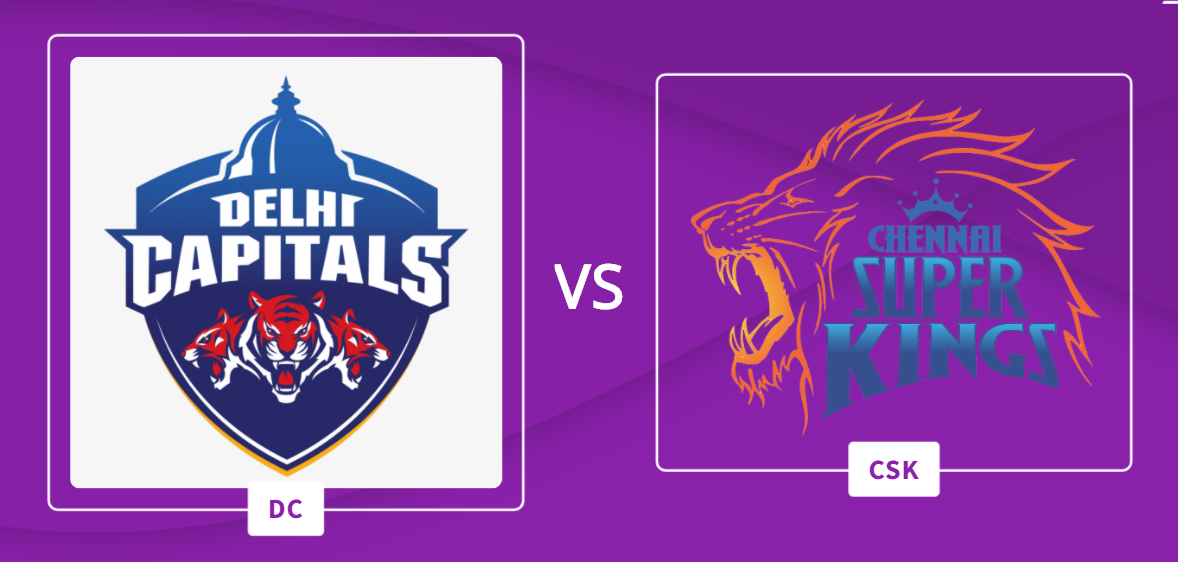

In [1]:
pip install xgboost

In [2]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

pd.set_option('display.max_columns', 50)

In [3]:
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")

In [4]:
DC_batsmen  = ['P Shaw', 'S Dhawan', 'AM Rahane', 'SS Iyer', 'MP Stoinis', 'AR Patel']
DC_bowlers = ['K Rabada', 'HV Patel', 'AR Patel', 'R Ashwin', 'MP Stoinis']
# No data for Nortje, T Deshpande

CSK_batsmen = ['S Curran', 'SR Watson', 'F du Plessis', 'AT Rayudu', 'MS Dhoni', 'RA Jadeja', 'DJ Bravo']
CSK_bowlers = ['DL Chahar', 'S Curran','SN Thakur', 'PP Chawla', 'RA Jadeja', 'DJ Bravo']

venue_CSK_DC = 'Sharjah Cricket Stadium'

###############################################################################################################################
# Part1:  How many runs will CSK Score in the match
###############################################################################################################################

## Part 1.1

In [5]:
CSK_bats = deliveries[deliveries.batsman.isin(CSK_batsmen)]
CSK_bats.batsman.unique()

array(['SR Watson', 'AT Rayudu', 'MS Dhoni', 'F du Plessis', 'RA Jadeja',
       'DJ Bravo', 'S Curran'], dtype=object)

In [6]:
CSK_men_balls_runs = CSK_bats.groupby(['match_id','batsman'])['batsman_runs'].count().reset_index(name = "balls_faced")
CSK_bats_runs_scored = CSK_bats.groupby(['match_id', 'batsman'])['batsman_runs'].sum().reset_index(name = "runs_scored")
CSK_men_balls_runs["runs_scored"] = CSK_bats_runs_scored.runs_scored.values

SW = CSK_men_balls_runs[CSK_men_balls_runs.batsman == 'SR Watson']
AR = CSK_men_balls_runs[CSK_men_balls_runs.batsman == 'AT Rayudu']
MD = CSK_men_balls_runs[CSK_men_balls_runs.batsman == 'MS Dhoni']
FP = CSK_men_balls_runs[CSK_men_balls_runs.batsman == 'F du Plessis']
RJ = CSK_men_balls_runs[CSK_men_balls_runs.batsman == 'RA Jadeja']
DB = CSK_men_balls_runs[CSK_men_balls_runs.batsman == 'DJ Bravo']
SC = CSK_men_balls_runs[CSK_men_balls_runs.batsman == 'S Curran']


#fig, axes = plt.subplots(2,1, figsize=(25,25))
#SW.plot.bar(x='balls_faced', y='runs_scored', ax=axes[0])
#AR.plot.bar(x='balls_faced', y='runs_scored', ax=axes[1])
#plt.show()

a1 = px.bar(SW, y='runs_scored', x = "balls_faced", 
             hover_data=['match_id','runs_scored'], color=SW.balls_faced, title='Balls faced and Runs scored by SA Watson')
a1.update_yaxes(showticklabels=False)
a1.show()


a1 = px.bar(AR, x = 'balls_faced',y='runs_scored',
             hover_data=['match_id','runs_scored'], color=AR.runs_scored, title='Balls faced and Runs scored by AT Rayudu')
a1.update_yaxes(showticklabels=False)
a1.show()
a1 = px.bar(MD, x = 'balls_faced',y='runs_scored',
             hover_data=['match_id','runs_scored'], color=MD.runs_scored, title='Balls faced and Runs scored by MS Dhoni')
a1.update_yaxes(showticklabels=False)
a1.show()
a1 = px.bar(FP, x = 'balls_faced',y='runs_scored',
             hover_data=['match_id','runs_scored'], color=FP.runs_scored, title='Balls faced and Runs scored by F du Plessis')
a1.update_yaxes(showticklabels=False)
a1.show()
a1 = px.bar(RJ, x = 'balls_faced',y='runs_scored',
             hover_data=['match_id','runs_scored'], color=RJ.runs_scored, title='Balls faced and Runs scored by RA Jadeja')
a1.show()
a1 = px.bar(DB, x = 'balls_faced',y='runs_scored',
             hover_data=['match_id','runs_scored'], color=DB.runs_scored, title='Balls faced and Runs scored by DJ Bravo')
a1.update_yaxes(showticklabels=False)
a1.show()
a1 = px.bar(SC, x = 'balls_faced',y='runs_scored',
             hover_data=['match_id','runs_scored'], color=SC.runs_scored, title='Balls faced and Runs scored by S Curran')
a1.update_yaxes(showticklabels=False)
a1.show()

In [7]:

print('Statistcs for number of balls faced by SR Watson', SW.balls_faced.describe())
print(']n\nStatistcs for number of balls faced by AT Rayudu', AR.balls_faced.describe())
print('\n\nStatistcs for number of balls faced by MS Dhoni', MD.balls_faced.describe())
print('\n\nStatistcs for number of balls faced by F du Plessis', FP.balls_faced.describe())
print('\n\nStatistcs for number of balls faced by RA Jadeja', RJ.balls_faced.describe())
print('\n\nStatistcs for number of balls faced by DJ Bravo', DB.balls_faced.describe())
print('\n\nStatistcs for number of balls faced by S Curran', SC.balls_faced.describe())



Statistcs for number of balls faced by SR Watson count    130.000000
mean      20.300000
std       15.261874
min        1.000000
25%        9.000000
50%       16.500000
75%       27.750000
max       64.000000
Name: balls_faced, dtype: float64
]n
Statistcs for number of balls faced by AT Rayudu count    138.000000
mean      19.427536
std       14.474689
min        1.000000
25%        7.250000
50%       17.000000
75%       28.750000
max       62.000000
Name: balls_faced, dtype: float64


Statistcs for number of balls faced by MS Dhoni count    170.000000
mean      19.517647
std       11.290266
min        1.000000
25%       11.000000
50%       18.000000
75%       27.750000
max       49.000000
Name: balls_faced, dtype: float64


Statistcs for number of balls faced by F du Plessis count    64.000000
mean     23.421875
std      14.822553
min       1.000000
25%      11.750000
50%      21.000000
75%      34.500000
max      55.000000
Name: balls_faced, dtype: float64


Statistcs for number of b

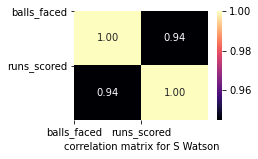

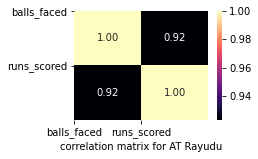

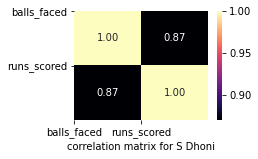

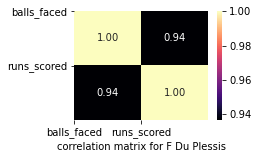

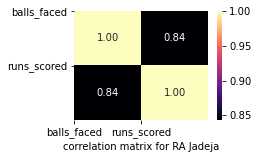

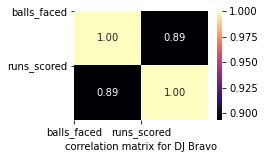

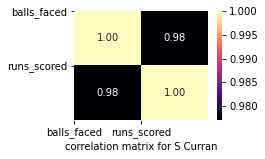

In [8]:
# balls faced : 20,19,20,23,13,12,7

SW["match_id"]= SW["match_id"].astype(str)
AR["match_id"]= AR["match_id"].astype(str)
MD["match_id"]= MD["match_id"].astype(str)
FP["match_id"]= FP["match_id"].astype(str)
RJ["match_id"]= RJ["match_id"].astype(str)
DB["match_id"]= DB["match_id"].astype(str)
SC["match_id"]= SC["match_id"].astype(str)

# Linear regression
corr1 = SW.corr()
corr2 = AR.corr()
corr3 = MD.corr()
corr4 = FP.corr()
corr5 = RJ.corr()
corr6 = DB.corr()
corr7 = SC.corr()

fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(corr1, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr1.columns)), corr1.columns);
plt.yticks(range(len(corr1.columns)), corr1.columns)
plt.xlabel("correlation matrix for S Watson")
plt.show()

fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(corr2, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr2.columns)), corr2.columns);
plt.yticks(range(len(corr2.columns)), corr2.columns)
plt.xlabel("correlation matrix for AT Rayudu")
plt.show()

fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(corr3, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr3.columns)), corr3.columns);
plt.yticks(range(len(corr3.columns)), corr3.columns)
plt.xlabel("correlation matrix for S Dhoni")
plt.show()

fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(corr4, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr4.columns)), corr4.columns);
plt.yticks(range(len(corr4.columns)), corr4.columns)
plt.xlabel("correlation matrix for F Du Plessis")
plt.show()


fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(corr5, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr5.columns)), corr5.columns);
plt.yticks(range(len(corr5.columns)), corr5.columns)
plt.xlabel("correlation matrix for RA Jadeja")
plt.show()

fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(corr6, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr6.columns)), corr6.columns);
plt.yticks(range(len(corr6.columns)), corr6.columns)
plt.xlabel("correlation matrix for DJ Bravo")
plt.show()

fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(corr7, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(corr7.columns)), corr7.columns);
plt.yticks(range(len(corr7.columns)), corr7.columns)
plt.xlabel("correlation matrix for S Curran")
plt.show()


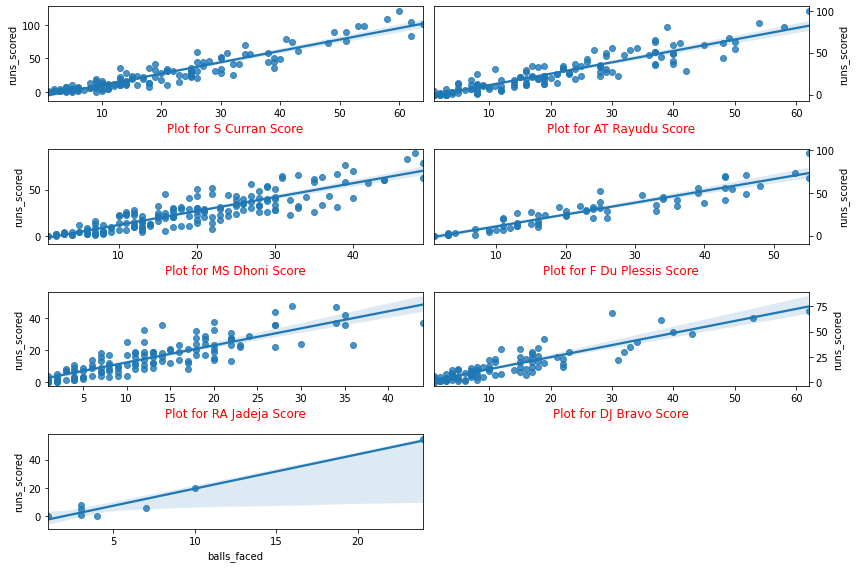

In [9]:
#SW,AR,MD,FP,RJ,DB,SC
import statsmodels.formula.api as smf
model1 = smf.ols("runs_scored~balls_faced",data = SW).fit()
model2 = smf.ols("runs_scored~balls_faced",data = AR).fit()
model3 = smf.ols("runs_scored~balls_faced",data = MD).fit()
model4 = smf.ols("runs_scored~balls_faced",data = FP).fit()
model5 = smf.ols("runs_scored~balls_faced",data = RJ).fit()
model6 = smf.ols("runs_scored~balls_faced",data = DB).fit()
model7 = smf.ols("runs_scored~balls_faced",data = SC).fit()


f, axes = plt.subplots(4, 2, figsize=(12,8))
sns.regplot(x="balls_faced", y="runs_scored", data=SW, ax = axes[0,0])
axes[0,0].set_xlabel('Plot for S Watson Score', fontsize=12, color ='red')
axes[0,0].yaxis.tick_left()

sns.regplot(x="balls_faced", y="runs_scored", data=AR, ax = axes[0,1])
axes[0,1].set_xlabel('Plot for AT Rayudu Score', fontsize=12, color ='red')
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()

sns.regplot(x="balls_faced", y="runs_scored", data=MD, ax = axes[1,0])
axes[1,0].set_xlabel('Plot for MS Dhoni Score', fontsize=12, color ='red')
axes[1,0].yaxis.tick_left()

sns.regplot(x="balls_faced", y="runs_scored", data=FP, ax = axes[1,1])
axes[1,1].set_xlabel('Plot for F Du Plessis Score', fontsize=12, color ='red')
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()

sns.regplot(x="balls_faced", y="runs_scored", data=RJ, ax = axes[2,0])
axes[2,0].set_xlabel('Plot for RA Jadeja Score', fontsize=12, color ='red')
axes[2,0].yaxis.tick_left()

sns.regplot(x="balls_faced", y="runs_scored", data=DB, ax = axes[2,1])
axes[2,1].set_xlabel('Plot for DJ Bravo Score', fontsize=12, color ='red')
axes[2,1].yaxis.set_label_position("right")
axes[2,1].yaxis.tick_right()


sns.regplot(x="balls_faced", y="runs_scored", data=SC, ax = axes[3,0])
axes[0,0].set_xlabel('Plot for S Curran Score', fontsize=12, color ='red')
axes[3,0].yaxis.tick_left()

axes[3,1].axis("off")
plt.tight_layout()
plt.show()

In [10]:
#R squared values
print("model1:",(model1.rsquared,model1.rsquared_adj))
print("model2:",(model2.rsquared,model2.rsquared_adj))
print("model3:",(model3.rsquared,model3.rsquared_adj))
print("model4:",(model4.rsquared,model4.rsquared_adj))
print("model5:",(model5.rsquared,model5.rsquared_adj))
print("model6:",(model6.rsquared,model6.rsquared_adj))
print("model7:",(model7.rsquared,model7.rsquared_adj))

model1: (0.8925007436706958, 0.8916609057306231)
model2: (0.8518210329785562, 0.8507314817504573)
model3: (0.7581005694295726, 0.7566606918666534)
model4: (0.8776669203428545, 0.875693806154836)
model5: (0.7112671884390414, 0.7089197672068385)
model6: (0.7987163693491958, 0.7966412803734143)
model7: (0.954724253782434, 0.9471782960795063)


In [11]:
print('Average number of balls faced by SR Watson', SW.balls_faced.mean())
print('Average number of balls faced by AT Rayudu', AR.balls_faced.mean())
print('Average number of balls faced by MS Dhoni', MD.balls_faced.mean())
print('Average number of balls faced by F du Plessis', FP.balls_faced.mean())
print('Average number of balls faced by RA Jadeja', RJ.balls_faced.mean())
print('Average number of balls faced by DJ Bravo', DB.balls_faced.mean())
print('Average number of balls faced by S Curran', SC.balls_faced.mean())

Average number of balls faced by SR Watson 20.3
Average number of balls faced by AT Rayudu 19.42753623188406
Average number of balls faced by MS Dhoni 19.51764705882353
Average number of balls faced by F du Plessis 23.421875
Average number of balls faced by RA Jadeja 13.056
Average number of balls faced by DJ Bravo 12.05050505050505
Average number of balls faced by S Curran 6.875


In [12]:
# prediction for new values
# using the average balls faced 

p_runs1 = pd.Series([SW.balls_faced.mean()])
p_runs2 = pd.Series([AR.balls_faced.mean()])
p_runs3 = pd.Series([MD.balls_faced.mean()])
p_runs4 = pd.Series([FP.balls_faced.mean()])
p_runs5 = pd.Series([RJ.balls_faced.mean()])
p_runs6 = pd.Series([DB.balls_faced.mean()])
p_runs7 = pd.Series([SC.balls_faced.mean()])

SW_ = pd.DataFrame(p_runs1,columns=['balls_faced'])
SW_["Expected_runs_by_S_Watson"] = model1.predict(SW_)

AR_ = pd.DataFrame(p_runs2,columns=['balls_faced'])
AR_["Expected_runs_by_AT_Rayudu"] = model2.predict(AR_)

MD_ = pd.DataFrame(p_runs3,columns=['balls_faced'])
MD_["Expected_runs_by_K_MS_Dhoni"] = model3.predict(MD_)

FP_ = pd.DataFrame(p_runs4,columns=['balls_faced'])
FP_["Expected_runs_by_DU_Plessis"] = model4.predict(FP_)

RJ_ = pd.DataFrame(p_runs5,columns=['balls_faced'])
RJ_["Expected_runs_by_R_Jadeja"] = model5.predict(RJ_)

DB_ = pd.DataFrame(p_runs6,columns=['balls_faced'])
DB_["Expected_runs_by_DJ_Bravo"] = model6.predict(DB_)

SC_ = pd.DataFrame(p_runs7,columns=['balls_faced'])
SC_["Expected_runs_by_S_Curran"] = model7.predict(SC_)

In [13]:
print("\n\n S Watson\n", SW_, "\n\nAT Rayudu\n", AR_, "\n\nMS Dhoni\n", MD_, "\n\nF Du Plessis\n", FP_, "\n\nRA Jadeja\n", RJ_,"\n\n DJ Bravo\n", DB_, "\n\nS Curran\n", SC_ )



 S Watson
    balls_faced  Expected_runs_by_S_Watson
0         20.3                       27.8 

AT Rayudu
    balls_faced  Expected_runs_by_AT_Rayudu
0    19.427536                   24.101449 

MS Dhoni
    balls_faced  Expected_runs_by_K_MS_Dhoni
0    19.517647                    26.335294 

F Du Plessis
    balls_faced  Expected_runs_by_DU_Plessis
0    23.421875                     29.28125 

RA Jadeja
    balls_faced  Expected_runs_by_R_Jadeja
0       13.056                     15.608 

 DJ Bravo
    balls_faced  Expected_runs_by_DJ_Bravo
0    12.050505                  15.131313 

S Curran
    balls_faced  Expected_runs_by_S_Curran
0        6.875                     11.875


## If we add above values we we get score of 151
we need to check the performances of these players against DC bowlers as well

## Part 1.2:

In [14]:
CSK_bats_ = CSK_bats[CSK_bats.bowler.isin(DC_bowlers)]
CSK_bats_.bowler.unique()

array(['MP Stoinis', 'AR Patel', 'K Rabada', 'R Ashwin', 'HV Patel'],
      dtype=object)

In [15]:
CSK_men_balls_runs_ = CSK_bats_.groupby(['match_id','batsman', 'bowler'])['batsman_runs'].count().reset_index(name = "balls_faced")
CSK_bats_runs_scored_ = CSK_bats_.groupby(['match_id', 'batsman', 'bowler'])['batsman_runs'].sum().reset_index(name = "runs_scored")
CSK_men_balls_runs_["runs_scored"] = CSK_bats_runs_scored_.runs_scored.values
SW_ = CSK_men_balls_runs_[CSK_men_balls_runs_.batsman == 'SR Watson']
AR_ = CSK_men_balls_runs_[CSK_men_balls_runs_.batsman == 'AT Rayudu']
MD_ = CSK_men_balls_runs_[CSK_men_balls_runs_.batsman == 'MS Dhoni']
FP_ = CSK_men_balls_runs_[CSK_men_balls_runs_.batsman == 'F du Plessis']
RJ_ = CSK_men_balls_runs_[CSK_men_balls_runs_.batsman == 'RA Jadeja']
DB_ = CSK_men_balls_runs_[CSK_men_balls_runs_.batsman == 'DJ Bravo']

a1_ = px.bar(SW_, x='bowler', y = "runs_scored", 
             hover_data=['match_id','runs_scored'], color=SW_.balls_faced, title='Balls faced and Runs scored by SA Watson against DC bowlers')
a1_.update_yaxes(showticklabels=False)
a1_.show()

a1_ = px.bar(AR_, x='bowler', y = "runs_scored",
             hover_data=['match_id','runs_scored'], color=AR_.balls_faced, title='Balls faced and Runs scored by AT Rayudu against DC bowlers')
a1_.update_yaxes(showticklabels=False)
a1_.show()
a1_ = px.bar(MD_, x='bowler', y = "runs_scored",
             hover_data=['match_id','runs_scored'], color=MD_.balls_faced, title='Balls faced and Runs scored by MS Dhoni against DC bowlers')
a1_.update_yaxes(showticklabels=False)
a1_.show()
a1_ = px.bar(FP_, x='bowler', y = "runs_scored",
             hover_data=['match_id','runs_scored'], color=FP_.balls_faced, title='Balls faced and Runs scored by F du Plessis against DC bowlers')
a1_.update_yaxes(showticklabels=False)
a1_.show()
a1_ = px.bar(RJ_, x='bowler', y = "runs_scored",
             hover_data=['match_id','runs_scored'], color=RJ_.balls_faced, title='Balls faced and Runs scored by RA Jadeja against DC bowlers')
a1_.show()
a1_ = px.bar(DB_, x='bowler', y = "runs_scored",
             hover_data=['match_id','runs_scored'], color=DB_.balls_faced, title='Balls faced and Runs scored by DJ Bravo against DC bowlers')
a1_.update_yaxes(showticklabels=False)
a1_.show()


Statistcs for number of balls faced by SR Watson count    17.000000
mean      5.764706
std       3.717012
min       2.000000
25%       3.000000
50%       5.000000
75%       7.000000
max      14.000000
Name: balls_faced, dtype: float64
Statistcs for number of balls faced by AT Rayudu count    23.000000
mean      5.565217
std       3.847385
min       1.000000
25%       3.000000
50%       4.000000
75%       7.000000
max      15.000000
Name: balls_faced, dtype: float64
Statistcs for number of balls faced by MS Dhoni count    16.000000
mean      8.125000
std       5.289928
min       2.000000
25%       3.750000
50%       7.000000
75%      11.000000
max      19.000000
Name: balls_faced, dtype: float64
Statistcs for number of balls faced by F du Plessis count     9.000000
mean      7.666667
std       3.427827
min       3.000000
25%       6.000000
50%       7.000000
75%      10.000000
max      14.000000
Name: balls_faced, dtype: float64
Statistcs for number of balls faced by RA Jadeja count    

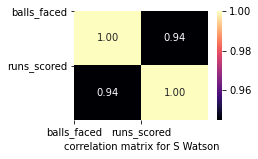

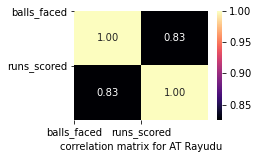

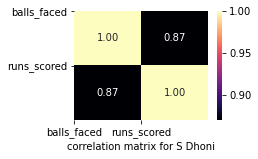

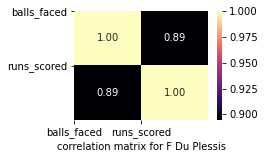

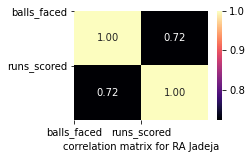

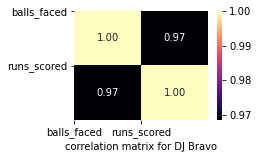

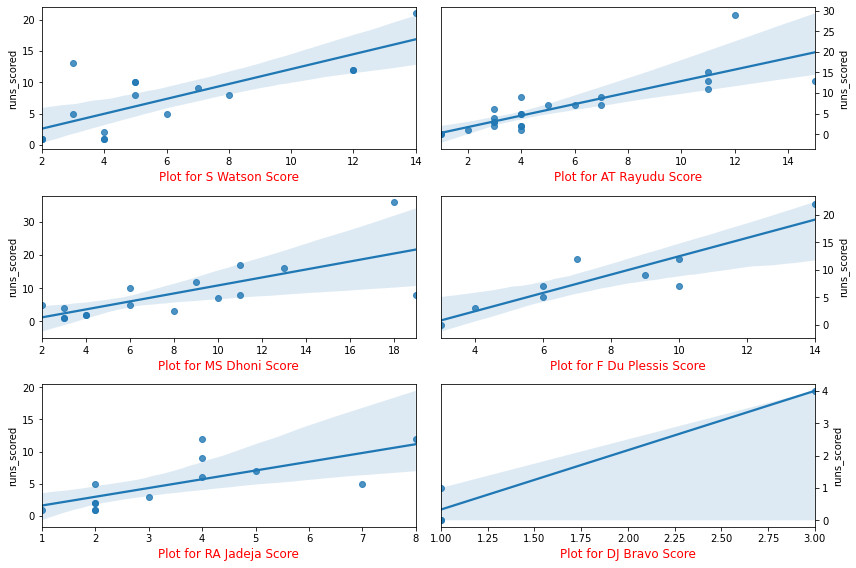

Maximum number of balls faced by SR Watson 14
Maximum number of balls faced by AT Rayudu 15
Maximum number of balls faced by MS Dhoni 19
Maximum number of balls faced by F du Plessis 14
Maximum number of balls faced by RA Jadeja 8
Maximum number of balls faced by DJ Bravo 3


 S Watson
    balls_faced  Expected_runs_by_S_Watson
0           14                  16.865354 

AT Rayudu
    balls_faced  Expected_runs_by_AT_Rayudu
0           15                   19.905607 

MS Dhoni
    balls_faced  Expected_runs_by_K_MS_Dhoni
0           19                    21.668851 

F Du Plessis
    balls_faced  Expected_runs_by_DU_Plessis
0           14                    19.111111 

RA Jadeja
    balls_faced  Expected_runs_by_R_Jadeja
0            8                  11.150289 

 DJ Bravo
    balls_faced  Expected_runs_by_DJ_Bravo
0            3                        4.0


In [16]:
CSK_men_balls_runs_1 = CSK_bats_.groupby(['match_id','batsman'])['batsman_runs'].count().reset_index(name = "balls_faced")
CSK_bats_runs_scored_1 = CSK_bats_.groupby(['match_id', 'batsman'])['batsman_runs'].sum().reset_index(name = "runs_scored")
CSK_men_balls_runs_1["runs_scored"] = CSK_bats_runs_scored_1.runs_scored.values

SW_1 = CSK_men_balls_runs_1[CSK_men_balls_runs_1.batsman == 'SR Watson']
AR_1 = CSK_men_balls_runs_1[CSK_men_balls_runs_1.batsman == 'AT Rayudu']
MD_1 = CSK_men_balls_runs_1[CSK_men_balls_runs_1.batsman == 'MS Dhoni']
FP_1 = CSK_men_balls_runs_1[CSK_men_balls_runs_1.batsman == 'F du Plessis']
RJ_1 = CSK_men_balls_runs_1[CSK_men_balls_runs_1.batsman == 'RA Jadeja']
DB_1 = CSK_men_balls_runs_1[CSK_men_balls_runs_1.batsman == 'DJ Bravo']


a = px.bar(SW_1, y='runs_scored', x = "balls_faced", 
             hover_data=['match_id','runs_scored'], color=SW_1.balls_faced, title='Balls faced and Runs scored by SA Watson')
a.update_yaxes(showticklabels=False)
a.show()


a = px.bar(AR_1, x = 'balls_faced',y='runs_scored',
             hover_data=['match_id','runs_scored'], color=AR_1.runs_scored, title='Balls faced and Runs scored by AT Rayudu')
a.update_yaxes(showticklabels=False)
a.show()
a = px.bar(MD_1, x = 'balls_faced',y='runs_scored',
             hover_data=['match_id','runs_scored'], color=MD_1.runs_scored, title='Balls faced and Runs scored by MS Dhoni')
a.update_yaxes(showticklabels=False)
a.show()
a = px.bar(FP_1, x = 'balls_faced',y='runs_scored',
             hover_data=['match_id','runs_scored'], color=FP_1.runs_scored, title='Balls faced and Runs scored by F du Plessis')
a.update_yaxes(showticklabels=False)
a.show()
a = px.bar(RJ_1, x = 'balls_faced',y='runs_scored',
             hover_data=['match_id','runs_scored'], color=RJ_1.runs_scored, title='Balls faced and Runs scored by RA Jadeja')
a.show()
a = px.bar(DB_1, x = 'balls_faced',y='runs_scored',
             hover_data=['match_id','runs_scored'], color=DB_1.runs_scored, title='Balls faced and Runs scored by DJ Bravo')
a.update_yaxes(showticklabels=False)
a.show()



print('Statistcs for number of balls faced by SR Watson', SW_1.balls_faced.describe())
print('Statistcs for number of balls faced by AT Rayudu', AR_1.balls_faced.describe())
print('Statistcs for number of balls faced by MS Dhoni', MD_1.balls_faced.describe())
print('Statistcs for number of balls faced by F du Plessis', FP_1.balls_faced.describe())
print('Statistcs for number of balls faced by RA Jadeja', RJ_1.balls_faced.describe())
print('Statistcs for number of balls faced by DJ Bravo', DB_1.balls_faced.describe())




# balls faced : 20,19,20,23,13,12,7

SW_1["match_id"]= SW_1["match_id"].astype(str)
AR_1["match_id"]= AR_1["match_id"].astype(str)
MD_1["match_id"]= MD_1["match_id"].astype(str)
FP_1["match_id"]= FP_1["match_id"].astype(str)
RJ_1["match_id"]= RJ_1["match_id"].astype(str)
DB_1["match_id"]= DB_1["match_id"].astype(str)


# Linear regression
c1 = SW_1.corr()
c2 = AR_1.corr()
c3 = MD_1.corr()
c4 = FP_1.corr()
c5 = RJ_1.corr()
c6 = DB_1.corr()


fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(corr1, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(c1.columns)), c1.columns);
plt.yticks(range(len(c1.columns)), c1.columns)
plt.xlabel("correlation matrix for S Watson")
plt.show()

fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(c2, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(c2.columns)), c2.columns);
plt.yticks(range(len(c2.columns)), c2.columns)
plt.xlabel("correlation matrix for AT Rayudu")
plt.show()

fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(corr3, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(c3.columns)), c3.columns);
plt.yticks(range(len(c3.columns)), c3.columns)
plt.xlabel("correlation matrix for S Dhoni")
plt.show()

fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(c4, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(c4.columns)), c4.columns);
plt.yticks(range(len(c4.columns)), c4.columns)
plt.xlabel("correlation matrix for F Du Plessis")
plt.show()


fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(c5, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(c5.columns)), c5.columns);
plt.yticks(range(len(c5.columns)), c5.columns)
plt.xlabel("correlation matrix for RA Jadeja")
plt.show()

fig, ax = plt.subplots(figsize=(3, 2))
sns.heatmap(c6, cmap='magma', annot=True, fmt=".2f")
plt.xticks(range(len(c6.columns)), c6.columns);
plt.yticks(range(len(c6.columns)), c6.columns)
plt.xlabel("correlation matrix for DJ Bravo")
plt.show()



#SW,AR,MD,FP,RJ,DB,SC
import statsmodels.formula.api as smf
m1 = smf.ols("runs_scored~balls_faced",data = SW_1).fit()
m2 = smf.ols("runs_scored~balls_faced",data = AR_1).fit()
m3 = smf.ols("runs_scored~balls_faced",data = MD_1).fit()
m4 = smf.ols("runs_scored~balls_faced",data = FP_1).fit()
m5 = smf.ols("runs_scored~balls_faced",data = RJ_1).fit()
m6 = smf.ols("runs_scored~balls_faced",data = DB_1).fit()

f, axes = plt.subplots(3, 2, figsize=(12,8))
sns.regplot(x="balls_faced", y="runs_scored", data=SW_1, ax = axes[0,0])
axes[0,0].set_xlabel('Plot for S Watson Score', fontsize=12, color ='red')
axes[0,0].yaxis.tick_left()

sns.regplot(x="balls_faced", y="runs_scored", data=AR_1, ax = axes[0,1])
axes[0,1].set_xlabel('Plot for AT Rayudu Score', fontsize=12, color ='red')
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()

sns.regplot(x="balls_faced", y="runs_scored", data=MD_1, ax = axes[1,0])
axes[1,0].set_xlabel('Plot for MS Dhoni Score', fontsize=12, color ='red')
axes[1,0].yaxis.tick_left()

sns.regplot(x="balls_faced", y="runs_scored", data=FP_1, ax = axes[1,1])
axes[1,1].set_xlabel('Plot for F Du Plessis Score', fontsize=12, color ='red')
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()

sns.regplot(x="balls_faced", y="runs_scored", data=RJ_1, ax = axes[2,0])
axes[2,0].set_xlabel('Plot for RA Jadeja Score', fontsize=12, color ='red')
axes[2,0].yaxis.tick_left()

sns.regplot(x="balls_faced", y="runs_scored", data=DB_1, ax = axes[2,1])
axes[2,1].set_xlabel('Plot for DJ Bravo Score', fontsize=12, color ='red')
axes[2,1].yaxis.set_label_position("right")
axes[2,1].yaxis.tick_right()


plt.tight_layout()
plt.show()



print('Maximum number of balls faced by SR Watson', SW_1.balls_faced.max())
print('Maximum number of balls faced by AT Rayudu', AR_1.balls_faced.max())
print('Maximum number of balls faced by MS Dhoni', MD_1.balls_faced.max())
print('Maximum number of balls faced by F du Plessis', FP_1.balls_faced.max())
print('Maximum number of balls faced by RA Jadeja', RJ_1.balls_faced.max())
print('Maximum number of balls faced by DJ Bravo', DB_1.balls_faced.max())


# prediction for new values
# using the average balls faced 

p1 = pd.Series([SW_1.balls_faced.max()])
p2 = pd.Series([AR_1.balls_faced.max()])
p3 = pd.Series([MD_1.balls_faced.max()])
p4 = pd.Series([FP_1.balls_faced.max()])
p5 = pd.Series([RJ_1.balls_faced.max()])
p6 = pd.Series([DB_1.balls_faced.max()])


SW__1 = pd.DataFrame(p1,columns=['balls_faced'])
SW__1["Expected_runs_by_S_Watson"] = m1.predict(SW__1)

AR__1 = pd.DataFrame(p2,columns=['balls_faced'])
AR__1["Expected_runs_by_AT_Rayudu"] = m2.predict(AR__1)

MD__1 = pd.DataFrame(p3,columns=['balls_faced'])
MD__1["Expected_runs_by_K_MS_Dhoni"] = m3.predict(MD__1)

FP__1 = pd.DataFrame(p4,columns=['balls_faced'])
FP__1["Expected_runs_by_DU_Plessis"] = m4.predict(FP__1)

RJ__1 = pd.DataFrame(p5,columns=['balls_faced'])
RJ__1["Expected_runs_by_R_Jadeja"] = m5.predict(RJ__1)

DB__1 = pd.DataFrame(p6,columns=['balls_faced'])
DB__1["Expected_runs_by_DJ_Bravo"] = m6.predict(DB__1)



print("\n\n S Watson\n", SW__1, "\n\nAT Rayudu\n", AR__1, "\n\nMS Dhoni\n", MD__1, "\n\nF Du Plessis\n", FP__1, "\n\nRA Jadeja\n", RJ__1,"\n\n DJ Bravo\n", DB__1)

## According to above data upto 103 runs will be scored on an average by these 5 players, but we need to add number of 6s and 4s to this average.
## let's add  Number of 4s, 6s hitting capability of CSK batsmen against DC bowlers to the above statistics

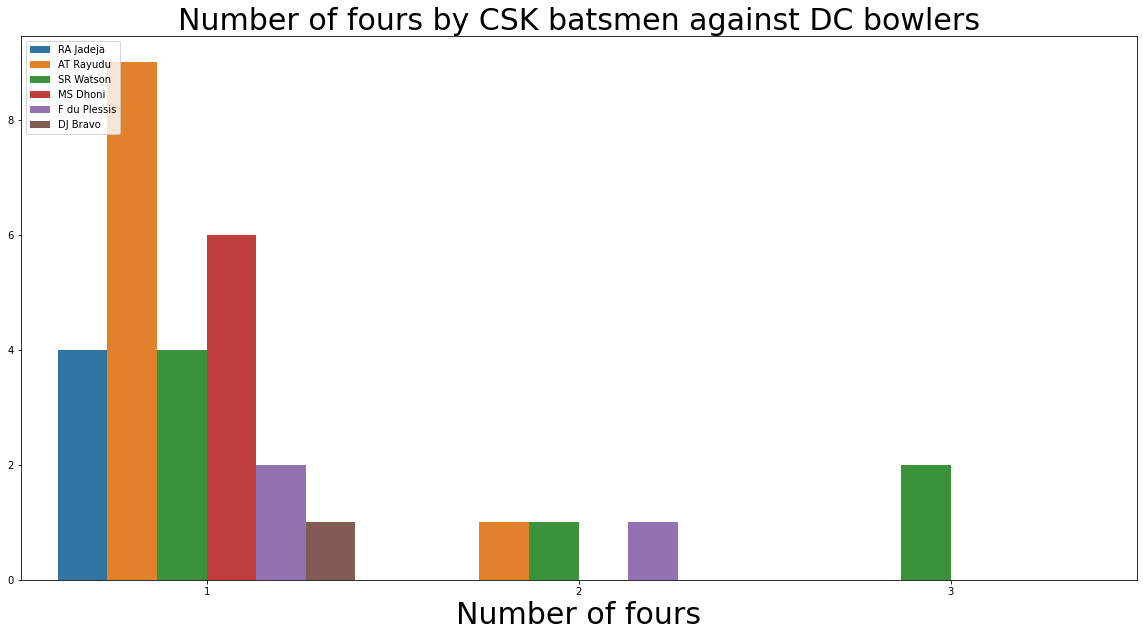

score due to 4 would range between : 28.59047619047619 - 40


In [17]:
CSK_bats_F = CSK_bats_[CSK_bats_.batsman_runs == 4]
CSK_bats_S = CSK_bats_[CSK_bats_.batsman_runs == 4]
CSK_bats_F_ = CSK_bats_F.groupby(['match_id','batsman'])['batsman_runs'].count().reset_index(name = "no_of_fours") 
CSK_bats_F_1 = CSK_bats_F.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index(name = "score")

plt.figure(figsize=(20,10))
sns.countplot(x = "no_of_fours", hue = "batsman", data = CSK_bats_F_) 
plt.legend(prop={'size':10})
plt.title("Number of fours by CSK batsmen against DC bowlers",fontsize=30)
plt.xlabel("Number of fours",fontsize=30)
plt.ylabel("",fontsize=30)
plt.show()
Average_score_4s = CSK_bats_F_1[CSK_bats_F_1.batsman == "RA Jadeja"].score.mean() + CSK_bats_F_1[CSK_bats_F_1.batsman == "AT Rayudu"].score.mean() + CSK_bats_F_1[CSK_bats_F_1.batsman == "SR Watson"].score.mean() + CSK_bats_F_1[CSK_bats_F_1.batsman == "MS Dhoni"].score.mean() + CSK_bats_F_1[CSK_bats_F_1.batsman == "F du Plessis"].score.mean()  + CSK_bats_F_1[CSK_bats_F_1.batsman == "DJ Bravo"].score.mean() 
score_4s = CSK_bats_F_1[CSK_bats_F_1.batsman == "RA Jadeja"].score.max() + CSK_bats_F_1[CSK_bats_F_1.batsman == "AT Rayudu"].score.max() + CSK_bats_F_1[CSK_bats_F_1.batsman == "SR Watson"].score.max() + CSK_bats_F_1[CSK_bats_F_1.batsman == "MS Dhoni"].score.max() + CSK_bats_F_1[CSK_bats_F_1.batsman == "F du Plessis"].score.max()  + CSK_bats_F_1[CSK_bats_F_1.batsman == "DJ Bravo"].score.max() 

print("score due to 4 would range between :", Average_score_4s, "-", score_4s)

In [18]:
# Individual score by CSK players againd DC bowlers is around 103
probable_score = 103 + score_4s
probable_score

143

# CSK batsmen's average score in IPL is 151 according part 1.1 analysis, Score against DC bowlers is 143 according part 1.2
## we need to consider venue also
## Part 1.3

In [19]:
IPL_data_ = pd.merge(deliveries, matches[['id','season', 'team1', 'team2', 'toss_winner', 'toss_decision','winner','result', 'dl_applied','win_by_runs','win_by_wickets', 'venue' ]], 
                    left_on='match_id', right_on='id')
IPL_data_.player_dismissed.fillna(0, inplace=True)

IPL_data_['player_dismissed'].loc[IPL_data_['player_dismissed'] != 0] = 1

IPL_data_train = IPL_data_.groupby(['match_id', 'inning', 'over','toss_winner', 'toss_decision', 'batting_team','bowling_team','bowler','batsman','winner', 'venue'])[['wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs','batsman_runs', 'extra_runs','total_runs', 'player_dismissed']].agg(['sum']).reset_index()

IPL_data_train.columns = IPL_data_train.columns.get_level_values(0)

matches_SCS_runs = IPL_data_train[IPL_data_train.venue == venue_CSK_DC]

# innings score and wickets #
matches_SCS_runs['innings_wickets'] = matches_SCS_runs.groupby(['match_id', 'inning'])['player_dismissed'].cumsum()
matches_SCS_runs['innings_score'] = matches_SCS_runs.groupby(['match_id', 'inning'])['total_runs'].cumsum()


In [20]:
IPL_Scores  = matches_SCS_runs.groupby(['match_id','inning'])['innings_wickets','innings_score'].max().reset_index()
IPL_Scores_1 = IPL_Scores[IPL_Scores.inning == 1]
IPL_Scores_2 = IPL_Scores[IPL_Scores.inning == 2]
print("Inning 1 score at ",venue_CSK_DC," : ", IPL_Scores_1)
print("\n\nInning 2 score at ",venue_CSK_DC," : ", IPL_Scores_2)

Inning 1 score at  Sharjah Cricket Stadium  :      match_id  inning  innings_wickets  innings_score
0        459       1                4            145
2        464       1                5            191
4        466       1                6            193
6        468       1                7            150
8        473       1                7            125
10       474       1                5            145


Inning 2 score at  Sharjah Cricket Stadium  :      match_id  inning  innings_wickets  innings_score
1        459       2                2            146
3        464       2                3            193
5        466       2               10            121
7        468       2                5            148
9        473       2                4            126
11       474       2                5            146


In [21]:
print("Average Score at ",venue_CSK_DC," in inning 1 is : ", IPL_Scores_1.innings_score.mean())
print("Average Score at ",venue_CSK_DC," in inning 2 is : ", IPL_Scores_2.innings_score.mean())

Average Score at  Sharjah Cricket Stadium  in inning 1 is :  158.16666666666666
Average Score at  Sharjah Cricket Stadium  in inning 2 is :  146.66666666666666


### CSK played 1 match at this location

In [22]:
SCS_CSK = matches_SCS_runs[matches_SCS_runs.batting_team == 'Chennai Super Kings']
SCS_CSK.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index(name = "inning_runs")
SCS_CSK

match_id  inning  over          toss_winner toss_decision  \
38492       474       2     1  Sunrisers Hyderabad           bat   
38493       474       2     2  Sunrisers Hyderabad           bat   
38494       474       2     2  Sunrisers Hyderabad           bat   
38495       474       2     3  Sunrisers Hyderabad           bat   
38496       474       2     3  Sunrisers Hyderabad           bat   
38497       474       2     4  Sunrisers Hyderabad           bat   
38498       474       2     4  Sunrisers Hyderabad           bat   
38499       474       2     5  Sunrisers Hyderabad           bat   
38500       474       2     5  Sunrisers Hyderabad           bat   
38501       474       2     6  Sunrisers Hyderabad           bat   
38502       474       2     6  Sunrisers Hyderabad           bat   
38503       474       2     7  Sunrisers Hyderabad           bat   
38504       474       2     7  Sunrisers Hyderabad           bat   
38505       474       2     8  Sunrisers Hyderabad           bat   
38506       474       2     9  Sunrisers Hyderabad           bat   
38507       474       2     9  Sunrisers Hyderabad           bat   
38508       474       2    10  Sunrisers Hyderabad           bat   
38509       474       2    10  Sunrisers Hyderabad           bat   
38510       474       2    11  Sunrisers Hyderabad           bat   
38511       474       2    11  Sunrisers Hyderabad           bat   
38512       474       2    11  Sunrisers Hyderabad           bat   
38513       474       2    12  Sunrisers Hyderabad           bat   
38514       474       2    12  Sunrisers Hyderabad           bat   
38515       474       2    13  Sunrisers Hyderabad           bat   
38516       474       2    13  Sunrisers Hyderabad           bat   
38517       474       2    14  Sunrisers Hyderabad           bat   
38518       474       2    15  Sunrisers Hyderabad           bat   
38519       474       2    15  Sunrisers Hyderabad           bat   
38520       474       2    16  Sunrisers Hyderabad           bat   
38521       474       2    16  Sunrisers Hyderabad           bat   
38522       474       2    16  Sunrisers Hyderabad           bat   
38523       474       2    16  Sunrisers Hyderabad           bat   
38524       474       2    17  Sunrisers Hyderabad           bat   
38525       474       2    17  Sunrisers Hyderabad           bat   
38526       474       2    18  Sunrisers Hyderabad           bat   
38527       474       2    18  Sunrisers Hyderabad           bat   
38528       474       2    19  Sunrisers Hyderabad           bat   
38529       474       2    19  Sunrisers Hyderabad           bat   
38530       474       2    19  Sunrisers Hyderabad           bat   
38531       474       2    20  Sunrisers Hyderabad           bat   
38532       474       2    20  Sunrisers Hyderabad           bat   

              batting_team         bowling_team     bowler       batsman  \
38492  Chennai Super Kings  Sunrisers Hyderabad   DW Steyn      DR Smith   
38493  Chennai Super Kings  Sunrisers Hyderabad    B Kumar   BB McCullum   
38494  Chennai Super Kings  Sunrisers Hyderabad    B Kumar      DR Smith   
38495  Chennai Super Kings  Sunrisers Hyderabad   DW Steyn   BB McCullum   
38496  Chennai Super Kings  Sunrisers Hyderabad   DW Steyn      DR Smith   
38497  Chennai Super Kings  Sunrisers Hyderabad  KV Sharma   BB McCullum   
38498  Chennai Super Kings  Sunrisers Hyderabad  KV Sharma      DR Smith   
38499  Chennai Super Kings  Sunrisers Hyderabad    B Kumar   BB McCullum   
38500  Chennai Super Kings  Sunrisers Hyderabad    B Kumar      DR Smith   
38501  Chennai Super Kings  Sunrisers Hyderabad  KV Sharma   BB McCullum   
38502  Chennai Super Kings  Sunrisers Hyderabad  KV Sharma      DR Smith   
38503  Chennai Super Kings  Sunrisers Hyderabad   A Mishra   BB McCullum   
38504  Chennai Super Kings  Sunrisers Hyderabad   A Mishra      DR Smith   
38505  Chennai Super Kings  Sunrisers Hyderabad   I Sharma      DR Smith   
38506  Che

## Hence, from above analysis it is evident that CSK will score between 145 - 155 runs in this match

################################################################################################################################
# Part 2: How many wickets will CSK take in death overs (15-20 overs/ 91st to 120th ball) 
################################################################################################################################

## Part 2.1

In [23]:
CSK_wickets = deliveries[deliveries.bowler.isin(CSK_bowlers)] 
CSK_wickets.player_dismissed.fillna(0, inplace=True)
CSK_wickets.bowler.unique()

array(['DL Chahar', 'PP Chawla', 'RA Jadeja', 'SN Thakur', 'DJ Bravo',
       'S Curran'], dtype=object)

In [24]:
CSK_wickets['player_dismissed'].loc[CSK_wickets['player_dismissed'] != 0] = 1
CSK_death_over = CSK_wickets[(CSK_wickets.over >= 15) & (CSK_wickets.over <= 20)]
CSK_death_over_ = CSK_death_over.groupby(['match_id', 'bowler'])['player_dismissed'].sum().reset_index(name = "no_of_wickets")

c = px.bar(CSK_death_over_[CSK_death_over_.bowler=="PP Chawla"], x=CSK_death_over_[CSK_death_over_.bowler=="PP Chawla"].index, y = "no_of_wickets", 
             hover_data=['match_id','no_of_wickets'], color=CSK_death_over_[CSK_death_over_.bowler=="PP Chawla"].no_of_wickets, title='Number of wickets taken by PP Chawla in death overs')
#c.update_yaxes(showticklabels=False)
c.show()

c = px.bar(CSK_death_over_[CSK_death_over_.bowler=="RA Jadeja"], x=CSK_death_over_[CSK_death_over_.bowler=="RA Jadeja"].index, y = "no_of_wickets", 
             hover_data=['match_id','no_of_wickets'], color=CSK_death_over_[CSK_death_over_.bowler=="RA Jadeja"].no_of_wickets, title='Number of wickets taken by RA Jadeja in death overs')
#c.update_yaxes(showticklabels=False)
c.show()

c = px.bar(CSK_death_over_[CSK_death_over_.bowler=="DJ Bravo"], x=CSK_death_over_[CSK_death_over_.bowler=="DJ Bravo"].index, y = "no_of_wickets", 
             hover_data=['match_id','no_of_wickets'], color=CSK_death_over_[CSK_death_over_.bowler=="DJ Bravo"].no_of_wickets, title='Number of wickets taken by DJ Bravo in death overs')
#c.update_yaxes(showticklabels=False)
c.show()

c = px.bar(CSK_death_over_[CSK_death_over_.bowler=="S Curran"], x=CSK_death_over_[CSK_death_over_.bowler=="S Curran"].index, y = "no_of_wickets", 
             hover_data=['match_id','no_of_wickets'], color=CSK_death_over_[CSK_death_over_.bowler=="S Curran"].no_of_wickets, title='Number of wickets taken by S Curran in death overs')
#c.update_yaxes(showticklabels=False)
c.show()


c = px.bar(CSK_death_over_[CSK_death_over_.bowler=="DL Chahar"], x=CSK_death_over_[CSK_death_over_.bowler=="DL Chahar"].index, y = "no_of_wickets", 
             hover_data=['match_id','no_of_wickets'], color=CSK_death_over_[CSK_death_over_.bowler=="DL Chahar"].no_of_wickets, title='Number of wickets taken by DL Chahar in death overs')
#c.update_yaxes(showticklabels=False)
c.show()

c = px.bar(CSK_death_over_[CSK_death_over_.bowler=="SN Thakur"], x=CSK_death_over_[CSK_death_over_.bowler=="SN Thakur"].index, y = "no_of_wickets", 
             hover_data=['match_id','no_of_wickets'], color=CSK_death_over_[CSK_death_over_.bowler=="SN Thakur"].no_of_wickets, title='Number of wickets taken by SN Thakur in death overs')
#c.update_yaxes(showticklabels=False)
c.show()

print("Average number of Wickets taken by CSK bowlers in death overs are\n","PP Chawla: ",CSK_death_over_[CSK_death_over_.bowler=="PP Chawla"].no_of_wickets.mean())
print("RA Jadeja: ",CSK_death_over_[CSK_death_over_.bowler=="RA Jadeja"].no_of_wickets.mean())
print("DJ Bravo: ",CSK_death_over_[CSK_death_over_.bowler=="DJ Bravo"].no_of_wickets.mean())
print("S Curran: ",CSK_death_over_[CSK_death_over_.bowler=="S Curran"].no_of_wickets.mean())
print("DL Chahar: ",CSK_death_over_[CSK_death_over_.bowler=="DL Chahar"].no_of_wickets.mean())
print("SN Thakur: ",CSK_death_over_[CSK_death_over_.bowler=="SN Thakur"].no_of_wickets.mean())

Average number of Wickets taken by CSK bowlers in death overs are
 PP Chawla:  0.5578947368421052
RA Jadeja:  0.47191011235955055
DJ Bravo:  0.963963963963964
S Curran:  1.0
DL Chahar:  0.7
SN Thakur:  0.8214285714285714


## Death over bowlers for CSK are DJ Bravo, SN Thakur and S Curran. Hence, the number wickets will be mostly 0-2 but there is higher possibility of taking upto 3 wickets by CSK.

################################################################################################################################
# Part 3: How many balls will CSK take to score their 100 runs
################################################################################################################################

## Part 3.1

In [25]:
# Considering less than 15 overs 
IPL_CD = deliveries[deliveries.over <=15]
IPL_dataCD = IPL_CD[(IPL_CD.batsman.isin(CSK_batsmen)) & (IPL_CD.bowler.isin(DC_bowlers))]
CSK_DC = IPL_dataCD.groupby(['match_id','batsman', 'bowler'])['batsman_runs', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'extra_runs'].sum().reset_index()
CSK_DC_ = IPL_dataCD.groupby(['match_id','batsman', 'bowler'])['ball'].count().reset_index()
CSK_DC_data = pd.merge(CSK_DC, CSK_DC_ ,how='inner',left_on=['match_id','batsman', 'bowler'],right_on=['match_id','batsman', 'bowler'])
# Importand Stats calculations
CSK_DC_stats_1 = CSK_DC_data.groupby(['batsman','bowler'])['batsman_runs','wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs','extra_runs','ball'].sum().reset_index()
CSK_DC_stats_1["batsman_strike_rate"] = ((CSK_DC_stats_1.batsman_runs*100)/CSK_DC_stats_1.ball)
CSK_DC_stats_1["bowler_economy_rate"] = ((CSK_DC_stats_1.batsman_runs)/(CSK_DC_stats_1.ball))*6
CSK_DC_stats_1

batsman      bowler  batsman_runs  wide_runs  bye_runs  legbye_runs  \
0      AT Rayudu    AR Patel            37          0         0            0   
1      AT Rayudu    HV Patel            35          1         0            0   
2      AT Rayudu  MP Stoinis             3          0         0            0   
3      AT Rayudu    R Ashwin            57          3         0            0   
4       DJ Bravo    AR Patel             0          0         0            0   
5       DJ Bravo    R Ashwin             0          0         0            0   
6   F du Plessis    AR Patel            55          1         0            1   
7   F du Plessis    HV Patel             3          0         0            0   
8   F du Plessis    R Ashwin            17          0         0            0   
9       MS Dhoni    AR Patel            24          1         0            0   
10      MS Dhoni    HV Patel            13          1         0            0   
11      MS Dhoni  MP Stoinis            19          2         0            2   
12      MS Dhoni    R Ashwin            17          0         0            1   
13     RA Jadeja    AR Patel            16          1         0            1   
14     RA Jadeja    HV Patel             7          0         0            0   
15     RA Jadeja  MP Stoinis             4          1         0            0   
16     RA Jadeja    R Ashwin            10          0         0            0   
17     SR Watson    AR Patel            42          2         0            0   
18     SR Watson    HV Patel             2          0         0            0   
19     SR Watson    K Rabada            12          0         0            0   
20     SR Watson    R Ashwin            64          3         0            1   

    noball_runs  penalty_runs  extra_runs  ball  batsman_strike_rate  \
0             0             0           0    23           160.869565   
1             0             0           1    32           109.375000   
2             0             0           0     3           100.000000   
3             0             0           3    55           103.636364   
4             0             0           0     1             0.000000   
5             0             0           0     1             0.000000   
6             0             0           2    42           130.952381   
7             0             0           0     7            42.857143   
8             0             0           0    18            94.444444   
9             0             0           1    30            80.000000   
10            0             0           1    16            81.250000   
11            0             0           4    21            90.476190   
12            0             0           1    11           154.545455   
13            0             0           2    14           114.285714   
14            0             0           0     5           140.000000   
15            0             0           1     4           100.000000   
16            0             0           0     5           200.000000   
17            0             0           2    39           107.692308   
18            0             0           0     6            33.333333   
19            0             0           0     9           133.333333   
20            0             0           4    44           145.454545   

    bowler_economy_rate  
0              9.652174  
1              6.562500  
2              6.000000  
3              6.218182  
4              0.000000  
5              0.000000  
6              7.857143  
7              2.571429  
8              5.666667  
9              4.800000  
10             4.875000  
11             5.428571  
12             9.272727  
13             6.857143  
14             8.400000  
15             6.000000  
16            12.000000  
17             6.461538  
18             2.000000  
19             8.000000  
20             8.727273

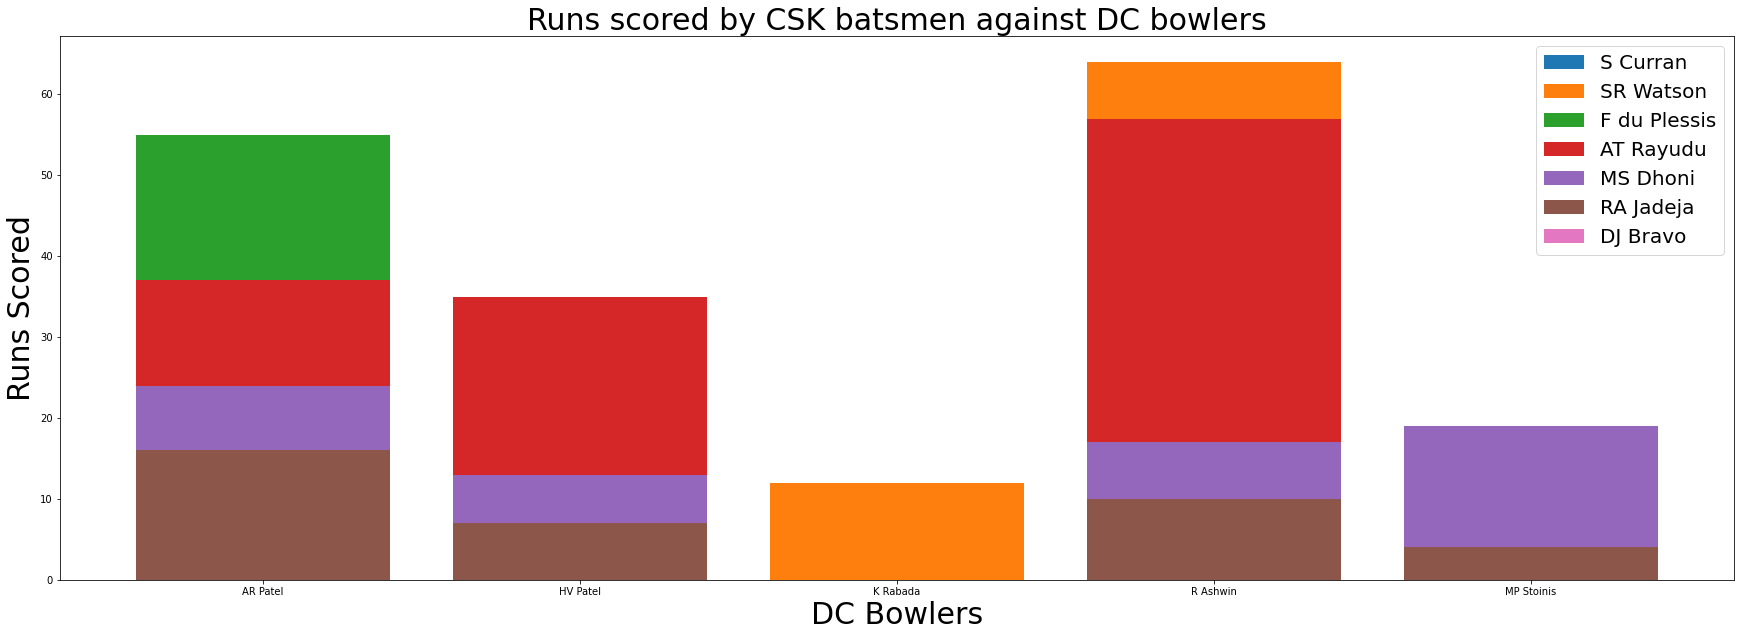

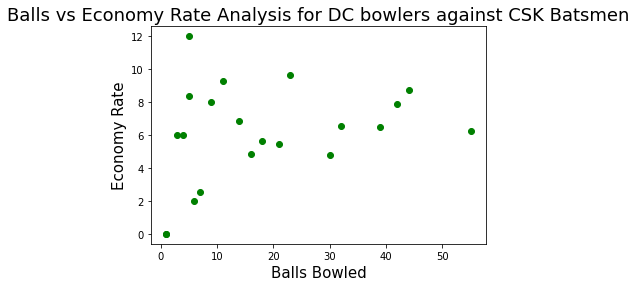

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

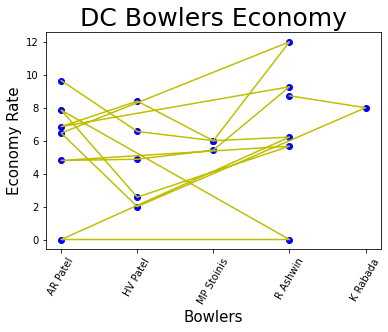

In [26]:
plt.figure(figsize=(30,10))
for name in CSK_batsmen:
    batsman_check = CSK_DC_stats_1[CSK_DC_stats_1.batsman==name]
    batsman_check.index = np.arange(1, len(batsman_check) + 1)
    x=batsman_check.bowler
    y=batsman_check.batsman_runs
    plt.bar(x,y)
plt.legend(CSK_batsmen,prop={'size':20})
plt.title("Runs scored by CSK batsmen against DC bowlers",fontsize= 30)
plt.xlabel("DC Bowlers",fontsize=30)
plt.ylabel("Runs Scored",fontsize=30)
plt.show()

# Bowlers Economy rates
plt.scatter(CSK_DC_stats_1['ball'],CSK_DC_stats_1['bowler_economy_rate'],color='g')
plt.xlabel('Balls Bowled',size=15)
plt.ylabel('Economy Rate',size=15)
plt.title('Balls vs Economy Rate Analysis for DC bowlers against CSK Batsmen',size=18)
plt.show()

plt.plot(CSK_DC_stats_1['bowler'],CSK_DC_stats_1['bowler_economy_rate'],color='y')
plt.scatter(CSK_DC_stats_1['bowler'],CSK_DC_stats_1['bowler_economy_rate'],color='b')
plt.xlabel('Bowlers',size=15)
plt.ylabel('Economy Rate',size=15)
plt.title('DC Bowlers Economy',size=25)
plt.xticks(rotation=60)

In [27]:
CSK_DC_stats_1.batsman.unique()
# possible batting sequence could be 
# S curran, SA Watson, F du Plessis, A Rayudu, MS Dhoni, RA jadeja, DJ Bravo

array(['AT Rayudu', 'DJ Bravo', 'F du Plessis', 'MS Dhoni', 'RA Jadeja',
       'SR Watson'], dtype=object)

In [28]:
CSK_DC_stats_1[CSK_DC_stats_1.batsman=='SR Watson']

batsman    bowler  batsman_runs  wide_runs  bye_runs  legbye_runs  \
17  SR Watson  AR Patel            42          2         0            0   
18  SR Watson  HV Patel             2          0         0            0   
19  SR Watson  K Rabada            12          0         0            0   
20  SR Watson  R Ashwin            64          3         0            1   

    noball_runs  penalty_runs  extra_runs  ball  batsman_strike_rate  \
17            0             0           2    39           107.692308   
18            0             0           0     6            33.333333   
19            0             0           0     9           133.333333   
20            0             0           4    44           145.454545   

    bowler_economy_rate  
17             6.461538  
18             2.000000  
19             8.000000  
20             8.727273

In [29]:
print("SA Watson :", "average balls faced: " ,CSK_DC_stats_1[CSK_DC_stats_1.batsman=='SR Watson'].ball.mean(), "Average runs scored: ", CSK_DC_stats_1[CSK_DC_stats_1.batsman=='SR Watson'].batsman_runs.mean())

SA Watson : average balls faced:  24.5 Average runs scored:  30.0


In [30]:
CSK_DC_stats_1[CSK_DC_stats_1.batsman=='F du Plessis']

batsman    bowler  batsman_runs  wide_runs  bye_runs  legbye_runs  \
6  F du Plessis  AR Patel            55          1         0            1   
7  F du Plessis  HV Patel             3          0         0            0   
8  F du Plessis  R Ashwin            17          0         0            0   

   noball_runs  penalty_runs  extra_runs  ball  batsman_strike_rate  \
6            0             0           2    42           130.952381   
7            0             0           0     7            42.857143   
8            0             0           0    18            94.444444   

   bowler_economy_rate  
6             7.857143  
7             2.571429  
8             5.666667

In [31]:
print("F du Plessis :", "average balls faced: " ,CSK_DC_stats_1[CSK_DC_stats_1.batsman=='F du Plessis'].ball.mean(), "Average runs scored: ", CSK_DC_stats_1[CSK_DC_stats_1.batsman=='F du Plessis'].batsman_runs.mean())

F du Plessis : average balls faced:  22.333333333333332 Average runs scored:  25.0


In [32]:
CSK_DC_stats_1[CSK_DC_stats_1.batsman=='AT Rayudu']

batsman      bowler  batsman_runs  wide_runs  bye_runs  legbye_runs  \
0  AT Rayudu    AR Patel            37          0         0            0   
1  AT Rayudu    HV Patel            35          1         0            0   
2  AT Rayudu  MP Stoinis             3          0         0            0   
3  AT Rayudu    R Ashwin            57          3         0            0   

   noball_runs  penalty_runs  extra_runs  ball  batsman_strike_rate  \
0            0             0           0    23           160.869565   
1            0             0           1    32           109.375000   
2            0             0           0     3           100.000000   
3            0             0           3    55           103.636364   

   bowler_economy_rate  
0             9.652174  
1             6.562500  
2             6.000000  
3             6.218182

In [33]:
print("AT Rayudu :", "average balls faced: " ,CSK_DC_stats_1[CSK_DC_stats_1.batsman=='AT Rayudu'].ball.mean(), "Average runs scored: ", CSK_DC_stats_1[CSK_DC_stats_1.batsman=='AT Rayudu'].batsman_runs.mean())

AT Rayudu : average balls faced:  28.25 Average runs scored:  33.0


In [34]:
CSK_DC_stats_1[CSK_DC_stats_1.batsman=='MS Dhoni']

batsman      bowler  batsman_runs  wide_runs  bye_runs  legbye_runs  \
9   MS Dhoni    AR Patel            24          1         0            0   
10  MS Dhoni    HV Patel            13          1         0            0   
11  MS Dhoni  MP Stoinis            19          2         0            2   
12  MS Dhoni    R Ashwin            17          0         0            1   

    noball_runs  penalty_runs  extra_runs  ball  batsman_strike_rate  \
9             0             0           1    30            80.000000   
10            0             0           1    16            81.250000   
11            0             0           4    21            90.476190   
12            0             0           1    11           154.545455   

    bowler_economy_rate  
9              4.800000  
10             4.875000  
11             5.428571  
12             9.272727

In [35]:
print("MS Dhoni :", "average balls faced: " ,CSK_DC_stats_1[CSK_DC_stats_1.batsman=='MS Dhoni'].ball.mean(), "Average runs scored: ", CSK_DC_stats_1[CSK_DC_stats_1.batsman=='MS Dhoni'].batsman_runs.mean())

MS Dhoni : average balls faced:  19.5 Average runs scored:  18.25


In [36]:
CSK_DC_stats_1[CSK_DC_stats_1.batsman=='RA Jadeja']

batsman      bowler  batsman_runs  wide_runs  bye_runs  legbye_runs  \
13  RA Jadeja    AR Patel            16          1         0            1   
14  RA Jadeja    HV Patel             7          0         0            0   
15  RA Jadeja  MP Stoinis             4          1         0            0   
16  RA Jadeja    R Ashwin            10          0         0            0   

    noball_runs  penalty_runs  extra_runs  ball  batsman_strike_rate  \
13            0             0           2    14           114.285714   
14            0             0           0     5           140.000000   
15            0             0           1     4           100.000000   
16            0             0           0     5           200.000000   

    bowler_economy_rate  
13             6.857143  
14             8.400000  
15             6.000000  
16            12.000000

In [37]:
print("RA Jadeja :", "average balls faced: " ,CSK_DC_stats_1[CSK_DC_stats_1.batsman=='RA Jadeja'].ball.mean(), "Average runs scored: ", CSK_DC_stats_1[CSK_DC_stats_1.batsman=='RA Jadeja'].batsman_runs.mean())

RA Jadeja : average balls faced:  7.0 Average runs scored:  9.25


In [38]:
CSK_DC_stats_1[CSK_DC_stats_1.batsman=='DJ Bravo']

batsman    bowler  batsman_runs  wide_runs  bye_runs  legbye_runs  \
4  DJ Bravo  AR Patel             0          0         0            0   
5  DJ Bravo  R Ashwin             0          0         0            0   

   noball_runs  penalty_runs  extra_runs  ball  batsman_strike_rate  \
4            0             0           0     1                  0.0   
5            0             0           0     1                  0.0   

   bowler_economy_rate  
4                  0.0  
5                  0.0

In [39]:
print("DJ Bravo :", "average balls faced: " ,CSK_DC_stats_1[CSK_DC_stats_1.batsman=='DJ Bravo'].ball.mean(), "Average runs scored: ", CSK_DC_stats_1[CSK_DC_stats_1.batsman=='DJ Bravo'].batsman_runs.mean())

DJ Bravo : average balls faced:  1.0 Average runs scored:  0.0


In [40]:
print("SA Watson :", "average balls faced: " ,CSK_DC_stats_1[CSK_DC_stats_1.batsman=='SR Watson'].ball.mean(), "Average runs scored: ", CSK_DC_stats_1[CSK_DC_stats_1.batsman=='SR Watson'].batsman_runs.mean())
print("F du Plessis :", "average balls faced: " ,CSK_DC_stats_1[CSK_DC_stats_1.batsman=='F du Plessis'].ball.mean(), "Average runs scored: ", CSK_DC_stats_1[CSK_DC_stats_1.batsman=='F du Plessis'].batsman_runs.mean())
print("AT Rayudu :", "average balls faced: " ,CSK_DC_stats_1[CSK_DC_stats_1.batsman=='AT Rayudu'].ball.mean(), "Average runs scored: ", CSK_DC_stats_1[CSK_DC_stats_1.batsman=='AT Rayudu'].batsman_runs.mean())
print("MS Dhoni :", "average balls faced: " ,CSK_DC_stats_1[CSK_DC_stats_1.batsman=='MS Dhoni'].ball.mean(), "Average runs scored: ", CSK_DC_stats_1[CSK_DC_stats_1.batsman=='MS Dhoni'].batsman_runs.mean())
print("RA Jadeja :", "average balls faced: " ,CSK_DC_stats_1[CSK_DC_stats_1.batsman=='RA Jadeja'].ball.mean(), "Average runs scored: ", CSK_DC_stats_1[CSK_DC_stats_1.batsman=='RA Jadeja'].batsman_runs.mean())
print("DJ Bravo :", "average balls faced: " ,CSK_DC_stats_1[CSK_DC_stats_1.batsman=='DJ Bravo'].ball.mean(), "Average runs scored: ", CSK_DC_stats_1[CSK_DC_stats_1.batsman=='DJ Bravo'].batsman_runs.mean())

SA Watson : average balls faced:  24.5 Average runs scored:  30.0
F du Plessis : average balls faced:  22.333333333333332 Average runs scored:  25.0
AT Rayudu : average balls faced:  28.25 Average runs scored:  33.0
MS Dhoni : average balls faced:  19.5 Average runs scored:  18.25
RA Jadeja : average balls faced:  7.0 Average runs scored:  9.25
DJ Bravo : average balls faced:  1.0 Average runs scored:  0.0


## Part 3.2 : Over by Over analysis

In [41]:
t1 = deliveries[deliveries.batting_team == "Chennai Super Kings"]
t1_ = t1[t1.batsman.isin(CSK_batsmen)]
# let's take a match where atleast 1st 5-6 batsmen of CSK 2020 squad are batting in a single match 
#match_id = 11415

In [42]:
score_df = pd.read_csv("deliveries.csv")
match_df = pd.read_csv("matches.csv")
match_df = match_df.loc[match_df.dl_applied == 0,:]
# runs and wickets per over #
score_df = pd.merge(score_df, match_df[['id','season', 'winner', 'result', 'dl_applied', 'team1', 'team2']], left_on='match_id', right_on='id')
score_df.player_dismissed.fillna(0, inplace=True)

score_df['player_dismissed'].loc[score_df['player_dismissed'] != 0] = 1
train_df = score_df.groupby(['match_id', 'inning', 'over', 'batting_team', 'winner', 'team1'])[['total_runs', 'player_dismissed']].agg(['sum']).reset_index()
train_df.columns = train_df.columns.get_level_values(0)
# innings score and wickets #
train_df['innings_wickets'] = train_df.groupby(['match_id', 'inning'])['player_dismissed'].cumsum()
train_df['innings_score'] = train_df.groupby(['match_id', 'inning'])['total_runs'].cumsum()
train_df.head()


match_id  inning  over         batting_team               winner  \
0         1       1     1  Sunrisers Hyderabad  Sunrisers Hyderabad   
1         1       1     2  Sunrisers Hyderabad  Sunrisers Hyderabad   
2         1       1     3  Sunrisers Hyderabad  Sunrisers Hyderabad   
3         1       1     4  Sunrisers Hyderabad  Sunrisers Hyderabad   
4         1       1     5  Sunrisers Hyderabad  Sunrisers Hyderabad   

                 team1  total_runs  player_dismissed  innings_wickets  \
0  Sunrisers Hyderabad           7                 0                0   
1  Sunrisers Hyderabad          16                 1                1   
2  Sunrisers Hyderabad           6                 0                1   
3  Sunrisers Hyderabad           4                 0                1   
4  Sunrisers Hyderabad           9                 0                1   

   innings_score  
0              7  
1             23  
2             29  
3             33  
4             42

In [43]:
temp_df = train_df.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()
temp_df

match_id  inning  total_runs
0            1       1         207
1            1       2         172
2            2       1         184
3            2       2         187
4            3       1         183
...        ...     ...         ...
1479     11413       2         170
1480     11414       1         155
1481     11414       2         162
1482     11415       1         152
1483     11415       2         157

[1484 rows x 3 columns]

In [44]:
temp_df = temp_df.loc[temp_df['inning']==1,:]

temp_df['inning'] = 2
temp_df.columns = ['match_id', 'inning', 'score_target']

train_df = train_df.merge(temp_df, how='left', on = ['match_id', 'inning'])
train_df.score_target.fillna(-1, inplace=True)

# get the remaining target #
def get_remaining_target(row):
    if row['score_target'] == -1.:
        return -1
    else:
        return row['score_target'] - row['innings_score']

train_df['remaining_target'] = train_df.apply(lambda row: get_remaining_target(row),axis=1)

# get the run rate #
train_df['run_rate'] = train_df['innings_score'] / train_df['over']

# get the remaining run rate #
def get_required_rr(row):
    if row['remaining_target'] == -1:
        return -1.
    elif row['over'] == 20:
        return 99
    else:
        return row['remaining_target'] / (20-row['over'])
    
train_df['required_run_rate'] = train_df.apply(lambda row: get_required_rr(row), axis=1)

def get_rr_diff(row):
    if row['inning'] == 1:
        return -1
    else:
        return row['run_rate'] - row['required_run_rate']

train_df['runrate_diff'] = train_df.apply(lambda row: get_rr_diff(row), axis=1)

train_df['is_batting_team'] = (train_df.team1 == train_df['batting_team']).astype('int')

train_df['target'] = (train_df['team1'] == train_df['winner']).astype('int')

train_df

match_id  inning  over         batting_team               winner  \
0             1       1     1  Sunrisers Hyderabad  Sunrisers Hyderabad   
1             1       1     2  Sunrisers Hyderabad  Sunrisers Hyderabad   
2             1       1     3  Sunrisers Hyderabad  Sunrisers Hyderabad   
3             1       1     4  Sunrisers Hyderabad  Sunrisers Hyderabad   
4             1       1     5  Sunrisers Hyderabad  Sunrisers Hyderabad   
...         ...     ...   ...                  ...                  ...   
28447     11415       2    16  Chennai Super Kings       Mumbai Indians   
28448     11415       2    17  Chennai Super Kings       Mumbai Indians   
28449     11415       2    18  Chennai Super Kings       Mumbai Indians   
28450     11415       2    19  Chennai Super Kings       Mumbai Indians   
28451     11415       2    20  Chennai Super Kings       Mumbai Indians   

                     team1  total_runs  player_dismissed  innings_wickets  \
0      Sunrisers Hyderabad           7                 0                0   
1      Sunrisers Hyderabad          16                 1                1   
2      Sunrisers Hyderabad           6                 0                1   
3      Sunrisers Hyderabad           4                 0                1   
4      Sunrisers Hyderabad           9                 0                1   
...                    ...         ...               ...              ...   
28447       Mumbai Indians          20                 0                4   
28448       Mumbai Indians           5                 0                4   
28449       Mumbai Indians          20                 0                4   
28450       Mumbai Indians          13                 1                5   
28451       Mumbai Indians           7                 2                7   

       innings_score  score_target  remaining_target   run_rate  \
0                  7          -1.0              -1.0   7.000000   
1                 23          -1.0              -1.0  11.500000   
2                 29          -1.0              -1.0   9.666667   
3                 33          -1.0              -1.0   8.250000   
4                 42          -1.0              -1.0   8.400000   
...              ...           ...               ...        ...   
28447            112         152.0              40.0   7.000000   
28448            117         152.0              35.0   6.882353   
28449            137         152.0              15.0   7.611111   
28450            150         152.0               2.0   7.894737   
28451            157         152.0              -5.0   7.850000   

       required_run_rate  runrate_diff  is_batting_team  target  
0              -1.000000     -1.000000                1       1  
1              -1.000000     -1.000000                1       1  
2              -1.000000     -1.000000                1       1  
3              -1.000000     -1.000000                1       1  
4              -1.000000     -1.000000                1       1  
...                  ...           ...              ...     ...  
28447          10.000000     -3.000000                0       1  
28448          11.666667     -4.784314                0       1  
28449           7.500000      0.111111                0       1  
28450           2.000000      5.894737                0       1  
28451          99.000000    -91.150000                0       1  

[28452 rows x 17 columns]

In [45]:
x_cols = ['inning', 'over', 'total_runs', 'player_dismissed', 'innings_wickets', 'innings_score', 'score_target', 'remaining_target', 'run_rate', 'required_run_rate', 'runrate_diff', 'is_batting_team']

# letus take a match where all the present CSK batmen are playing in a single match
val_df = train_df.loc[train_df.match_id == 11415,:]
dev_df = train_df.loc[train_df.match_id != 11415,:]

# create the input and target variables #
dev_X = np.array(dev_df[x_cols[:]])
dev_y = np.array(dev_df['target'])
val_X = np.array(val_df[x_cols[:]])[:-1,:]
val_y = np.array(val_df['target'])[:-1]
print(dev_X.shape, dev_y.shape)
print(val_X.shape, val_y.shape)

(28412, 12) (28412,)
(39, 12) (39,)


In [46]:
# XGBOOST is used for modelling: (Gradient Boosting algorithm)
# define the function to create the model #
def runXGB(train_X, train_y, seed_val=0):
    param = {}
    param['objective'] = 'binary:logistic'
    param['eta'] = 0.05
    param['max_depth'] = 8
    param['silent'] = 1
    param['eval_metric'] = "auc"
    param['min_child_weight'] = 1
    param['subsample'] = 0.7
    param['colsample_bytree'] = 0.7
    param['seed'] = seed_val
    num_rounds = 100

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)
    model = xgb.train(plst, xgtrain, num_rounds)
    return model

[12:26:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




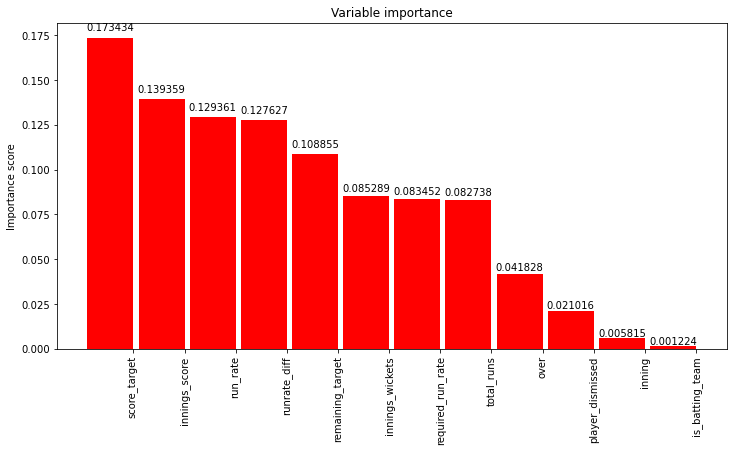

In [47]:
# build a model for prediction
model = runXGB(dev_X, dev_y)
xgtest = xgb.DMatrix(val_X)
preds = model.predict(xgtest)

# Important variables which are contributing 
def create_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    for i, feat in enumerate(features):
        outfile.write('{0}\t{1}\tq\n'.format(i,feat))
    outfile.close()

create_feature_map(x_cols)
importance = model.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)
imp_df = pd.DataFrame(importance, columns=['feature','fscore'])
imp_df['fscore'] = imp_df['fscore'] / imp_df['fscore'].sum()

# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%f' % float(height),
                ha='center', va='bottom')
        
labels = np.array(imp_df.feature.values)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,6))
rects = ax.bar(ind, np.array(imp_df.fscore.values), width=width, color='r')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Importance score")
ax.set_title("Variable importance")
autolabel(rects)
plt.show()

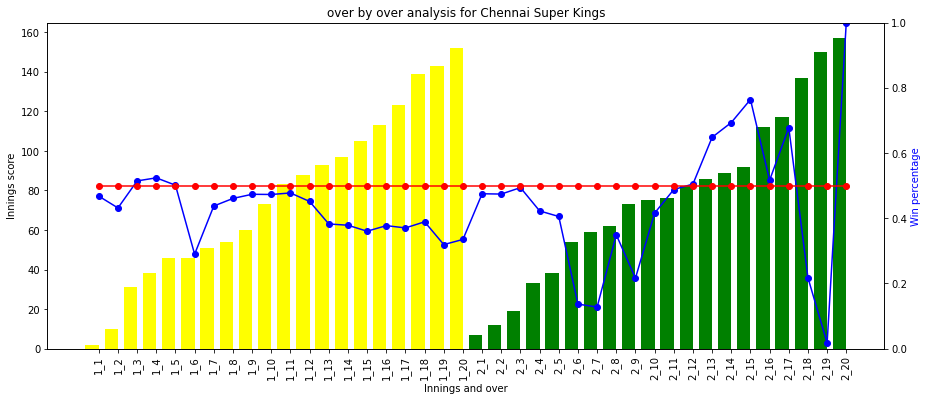

In [48]:
# Win probability Prediction
out_df = pd.DataFrame({'Team1':val_df.team1.values})
out_df['is_batting_team'] = val_df.is_batting_team.values
out_df['innings_over'] = np.array(val_df.apply(lambda row: str(row['inning']) + "_" + str(row['over']), axis=1))
out_df['innings_score'] = val_df.innings_score.values
out_df['innings_wickets'] = val_df.innings_wickets.values
out_df['score_target'] = val_df.score_target.values
out_df['total_runs'] = val_df.total_runs.values
out_df['predictions'] = list(preds)+[1]

fig, ax1 = plt.subplots(figsize=(15,6))
ax2 = ax1.twinx()
labels = np.array(out_df['innings_over'])
ind = np.arange(len(labels))
width = 0.7
rects = ax1.bar(ind, np.array(out_df['innings_score']), width=width, color=['yellow']*20 + ['green']*20)
ax1.set_xticks(ind+((width)/2.))
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Innings score")
ax1.set_xlabel("Innings and over")
ax1.set_title("over by over analysis for Chennai Super Kings")

ax2.plot(ind+0.35, np.array(out_df['predictions']), color='b', marker='o')
ax2.plot(ind+0.35, np.array([0.5]*40), color='red', marker='o')
ax2.set_ylabel("Win percentage", color='b')
ax2.set_ylim([0,1])
ax2.grid(b=False)
plt.show()

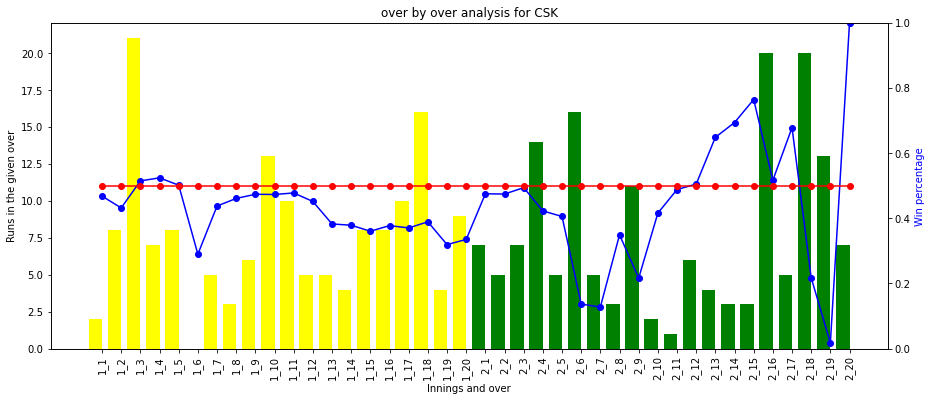

In [49]:
#deliveries[deliveries.match_id == 11415].loc[deliveries.inning ==2]
fig, ax1 = plt.subplots(figsize=(15,6))
ax2 = ax1.twinx()
labels = np.array(out_df['innings_over'])
ind = np.arange(len(labels))
width = 0.7
rects = ax1.bar(ind, np.array(out_df['total_runs']), width=width, color=['yellow']*20 + ['green']*20)
ax1.set_xticks(ind+((width)/2.))
ax1.set_xticklabels(labels, rotation='vertical')
ax1.set_ylabel("Runs in the given over")
ax1.set_xlabel("Innings and over")
ax1.set_title("over by over analysis for CSK")

ax2.plot(ind+0.35, np.array(out_df['predictions']), color='b', marker='o')
ax2.plot(ind+0.35, np.array([0.5]*40), color='red', marker='o')
ax2.set_ylabel("Win percentage", color='b')
ax2.set_ylim([0,1])
ax2.grid(b=False)
plt.show()

## Here, Green is for CSK.
## We can see the over by over runs of CSK and we can conclude from above analysisand based on analysis done in part 3.1 that CSK will need more than 70 balls to reach upto score of 100

# Part 4 : How many no balls will be bowled in the match?

In [50]:
bowlers = ['K Rabada', 'HV Patel', 'AR Patel', 'R Ashwin', 'MP Stoinis', 'DL Chahar', 'S Curran', 'SN Thakur', 'PP Chawla', 'RA Jadeja', 'DJ Bravo']

In [51]:
bowlers_data = deliveries[deliveries.bowler.isin(bowlers)]
no_balls = bowlers_data.groupby(['match_id','bowler'])['noball_runs'].sum().reset_index(name = "no_of_noballs")
no_balls.bowler.unique()

array(['DL Chahar', 'PP Chawla', 'AR Patel', 'MP Stoinis', 'RA Jadeja',
       'SN Thakur', 'K Rabada', 'HV Patel', 'DJ Bravo', 'R Ashwin',
       'S Curran'], dtype=object)

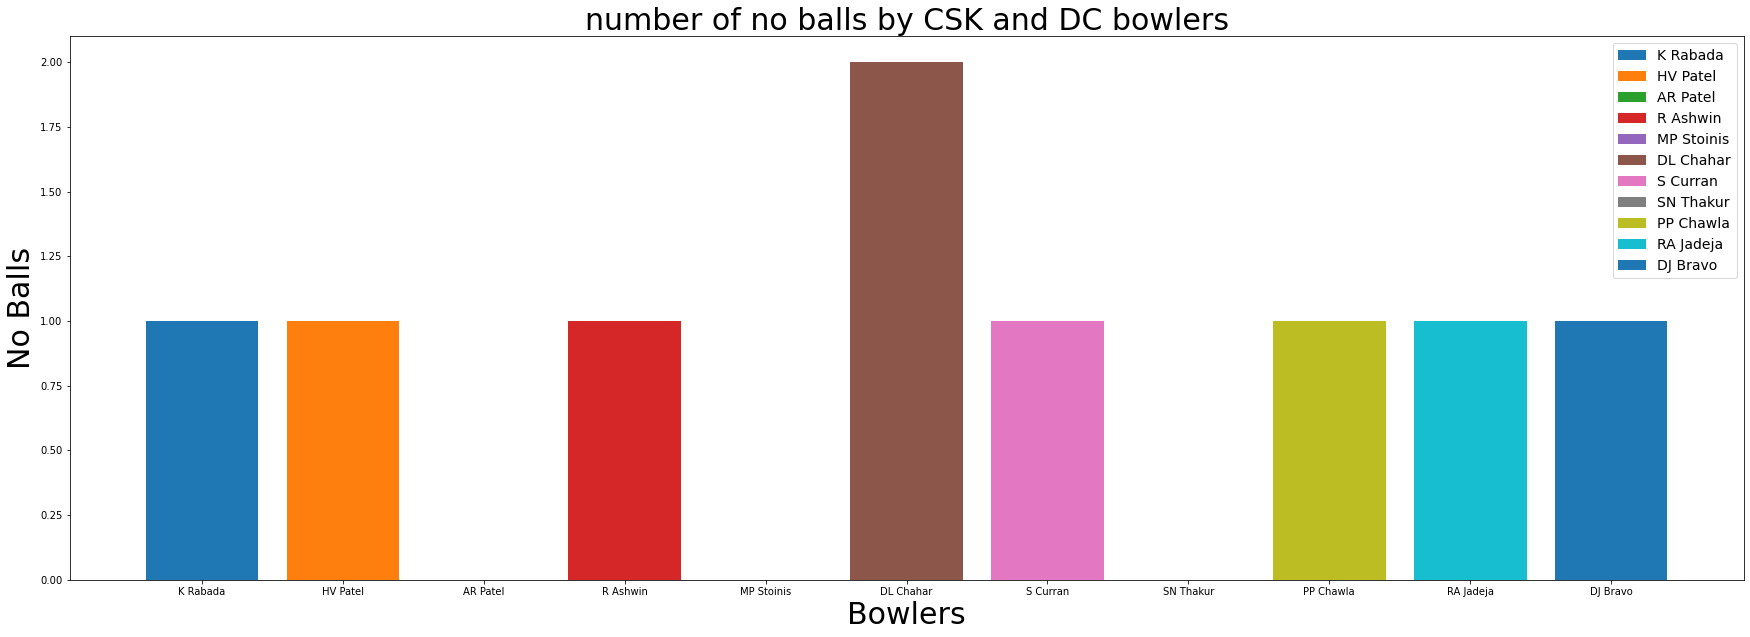

In [52]:
plt.figure(figsize=(30,10))
for name in bowlers:
    batsman_check_ = no_balls[no_balls.bowler==name]
    batsman_check_.index = np.arange(1, len(batsman_check_) + 1)
    x=batsman_check_.bowler
    y=batsman_check_.no_of_noballs
    plt.bar(x,y)
plt.legend(bowlers,prop={'size':14})
plt.title("number of no balls by CSK and DC bowlers",fontsize= 30)
plt.xlabel("Bowlers",fontsize=30)
plt.ylabel("No Balls",fontsize=30)
plt.show()

##  From above plot , it is evident that number of no balls bowled in CSK VS DC match will be<br> 0 - 1

################################################################################################################################
# Part 5: Who will win the match?
###############################################################################################################################

In [53]:
matches.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
matches.team1.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.team2.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

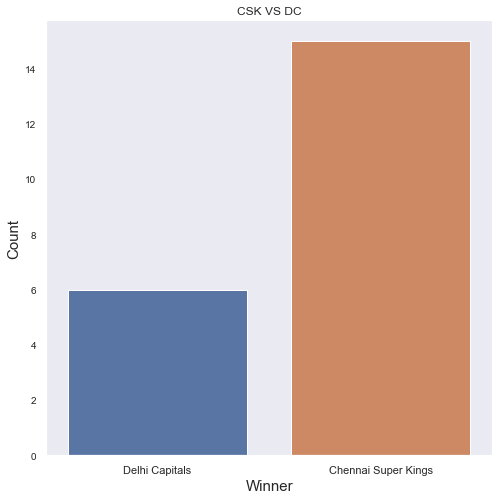

In [54]:
match_CD = matches[((matches.team1 == "Chennai Super Kings") &(matches.team2 == "Delhi Capitals")) | ((matches.team2 == "Chennai Super Kings") &(matches.team1 == "Delhi Capitals"))]
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(8,8)

sns.countplot(x="winner",data=match_CD)
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=10)
plt.title('CSK VS DC')
plt.show()

## CSK seems leading according to past records.

In [55]:
#venuewise
match_CSK = matches[(matches.venue == venue_CSK_DC) & ((matches.team1 == "Chennai Super Kings") | (matches.team2 == "Chennai Super Kings"))]
match_CSK

id  season     city        date                team1  \
473  474    2014  Sharjah  2014-04-27  Sunrisers Hyderabad   

                   team2          toss_winner toss_decision  result  \
473  Chennai Super Kings  Sunrisers Hyderabad           bat  normal   

     dl_applied               winner  win_by_runs  win_by_wickets  \
473           0  Chennai Super Kings            0               5   

    player_of_match                    venue       umpire1      umpire2  \
473        DR Smith  Sharjah Cricket Stadium  AK Chaudhary  VA Kulkarni   

    umpire3  
473     NaN

## CSK has won 1 match at this venue.

In [56]:
#venuewise
match_DC = matches[(matches.venue == venue_CSK_DC) & ((matches.team1 == "Delhi Capitals") | (matches.team2 == "Delhi Capitals"))]
match_DC

id  season     city        date           team1  \
458  459    2014  Sharjah  2014-04-17  Delhi Capitals   
472  473    2014  Sharjah  2014-04-27  Mumbai Indians   

                           team2                  toss_winner toss_decision  \
458  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
472               Delhi Capitals               Mumbai Indians           bat   

     result  dl_applied                       winner  win_by_runs  \
458  normal           0  Royal Challengers Bangalore            0   
472  normal           0               Delhi Capitals            0   

     win_by_wickets player_of_match                    venue    umpire1  \
458               8       YS Chahal  Sharjah Cricket Stadium  Aleem Dar   
472               6         M Vijay  Sharjah Cricket Stadium  Aleem Dar   

         umpire2 umpire3  
458       S Ravi     NaN  
472  VA Kulkarni     NaN

## Delhi has also won a single match here from 2 games it played at this venue

## According to analysis done in part1 , 2 and 3.
## CSK might win today